In [46]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [47]:
msts = np.load('data/msts.npy', allow_pickle='TRUE').item()
pmfgs = np.load('data/pmfgs.npy', allow_pickle='TRUE').item()


#changing pmfgs so it has the same layout as msts

#setting tickers as node attributes for pmfgs
for i, (k,pmfg) in enumerate(sorted(pmfgs.items())):
    tickers = {index: stockname for index, stockname in enumerate(pmfg['ticker'])}
    nx.set_node_attributes(pmfg['network'], tickers , 'ticker')

#changing dictionary structure to { <timestamp> : <pmfg> }
pmfgs = {k:v['network'] for k,v in pmfgs.items()}

In [48]:
mst = msts[list(sorted(msts.keys()))[0]]
pmfg = pmfgs[list(sorted(pmfgs.keys()))[0]]

In [49]:
sum(dict(nx.shortest_path_length(mst))[0].values())

50

In [50]:
(1/550) * sum(dict(nx.shortest_path_length(mst))[0].values())

0.09090909090909091

In [51]:
#properties to consider

# normalized tree length  https://link.springer.com/article/10.1007/s10614-016-9627-7


In [52]:
def get_network_properties(network_dict):

    network_properties = {}

    for k,G in sorted(network_dict.items()):
        properties = {}

        properties['nodes'] = G.number_of_nodes()
        properties['degree_average'] = np.mean([x[1] for x in list(G.degree())])
        properties['max_degree'] = np.max([x[1] for x in list(G.degree())])
        properties['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        properties['normalized_tree_length'] = (1/G.number_of_edges()) * sum(dict(nx.shortest_path_length(G))[0].values())
        #properties['average_path_length'] = (2/(G.number_of_nodes()*G.number_of_edges())) * sum(dict(nx.shortest_path_length(G))[0].values())
        properties['average_degree_centrality'] = np.mean(list(nx.degree_centrality(G).values()))
        properties['average_betweenness_centrality'] = np.mean(list(nx.betweenness_centrality(G).values()))
        properties['average_closeness_centrality'] = np.mean(list(nx.closeness_centrality(G).values()))





        network_properties[k] = properties

    return network_properties


In [53]:
msts_properties = get_network_properties(msts)
pmfgs_properties = get_network_properties(pmfgs)

In [54]:
df_mst_propetries = pd.DataFrame.from_dict(msts_properties).T

df_pmfgs_properties = pd.DataFrame.from_dict(pmfgs_properties).T

In [55]:
df_mst_propetries

,nodes,degree_average,max_degree,average_shortest_path_length,normalized_tree_length,average_degree_centrality,average_betweenness_centrality,average_closeness_centrality
2020-01-08 01-00-00,25.0,1.920000,22.0,2.133333,2.083333,0.080000,0.049275,0.484620
2020-01-15 01-00-00,26.0,1.923077,21.0,2.200000,2.040000,0.076923,0.050000,0.469032
2020-01-22 01-00-00,27.0,1.925926,11.0,2.757835,1.692308,0.074074,0.070313,0.373545
2020-01-29 01-00-00,24.0,1.916667,17.0,2.543478,2.000000,0.083333,0.070158,0.411613
2020-02-05 01-00-00,26.0,1.923077,12.0,2.790769,1.880000,0.076923,0.074615,0.371181
...,...,...,...,...,...,...,...,...
2021-10-27 01-00-00,56.0,1.964286,43.0,2.337013,2.200000,0.035714,0.024759,0.438009
2021-11-03 01-00-00,55.0,1.963636,33.0,2.725926,2.092593,0.036364,0.032565,0.379618
2021-11-10 01-00-00,56.0,1.964286,34.0,2.760390,2.345455,0.035714,0.032600,0.369146
2021-11-17 01-00-00,55.0,1.963636,44.0,2.274747,1.870370,0.036364,0.024052,0.449031


In [56]:
df_pmfgs_properties

,nodes,degree_average,max_degree,average_shortest_path_length,normalized_tree_length,average_degree_centrality,average_betweenness_centrality,average_closeness_centrality
2020-01-08 01-00-00,25.0,5.520000,23.0,1.826667,0.652174,0.230000,0.035942,0.563715
2020-01-15 01-00-00,26.0,5.538462,24.0,1.806154,0.472222,0.221538,0.033590,0.564400
2020-01-22 01-00-00,27.0,5.555556,24.0,1.846154,0.373333,0.213675,0.033846,0.554430
2020-01-29 01-00-00,24.0,5.500000,20.0,1.880435,0.393939,0.239130,0.040020,0.548701
2020-02-05 01-00-00,26.0,5.538462,22.0,1.889231,0.402778,0.221538,0.037051,0.544223
...,...,...,...,...,...,...,...,...
2021-10-27 01-00-00,56.0,5.785714,48.0,1.992208,0.567901,0.105195,0.018374,0.509249
2021-11-03 01-00-00,55.0,5.781818,39.0,2.183165,0.628931,0.107071,0.022324,0.466725
2021-11-10 01-00-00,56.0,5.785714,52.0,1.926623,0.561728,0.105195,0.017160,0.525515
2021-11-17 01-00-00,55.0,5.781818,47.0,1.996633,0.572327,0.107071,0.018804,0.508960


C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_12480/1496274293.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_mst_propetries.drop('nodes',1).drop('max_degree',1).plot(figsize=(16,9))


<AxesSubplot:>

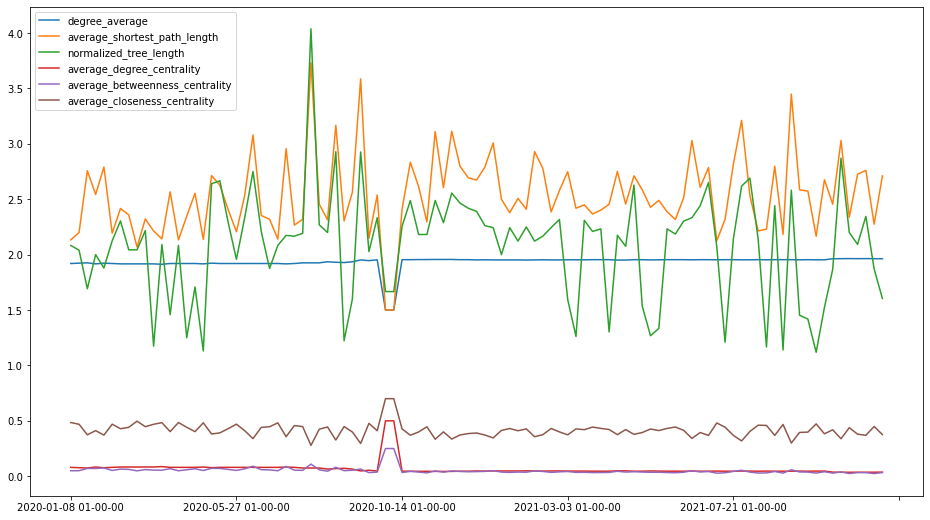

In [57]:
df_mst_propetries.drop('nodes',1).drop('max_degree',1).plot(figsize=(16,9))

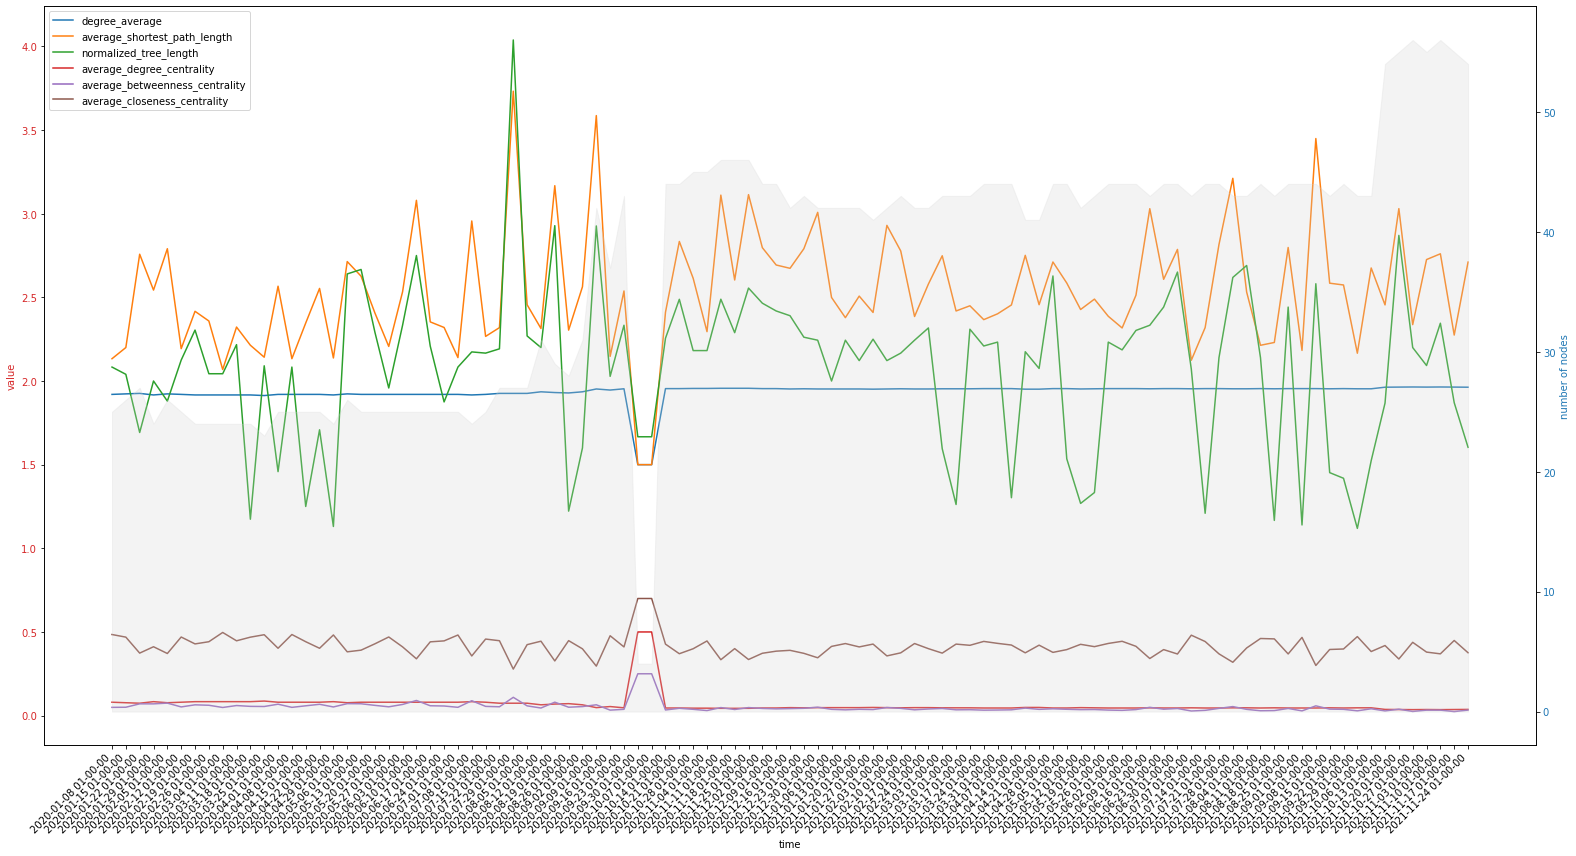

In [58]:
fig, ax1 = plt.subplots(figsize=(22, 12))


color = 'tab:red'
ax1.set_xlabel('time')
#ax1.tick_params(axis='x', rotation=45)
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')


ax1.set_ylabel('value', color=color)

to_skip = ['nodes', 'max_degree']
for column in df_mst_propetries:
    if column in to_skip:
        continue
    ax1.plot(df_mst_propetries[column],label=column)
    ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('number of nodes', color=color)  # we already handled the x-label with ax1
#ax2.plot(df_mst_propetries['nodes'], color='grey', alpha=0.5)
ax2.fill_between(df_mst_propetries.index,df_mst_propetries['nodes'], color='lightgrey', alpha=0.25)
ax2.tick_params(axis='y', labelcolor=color)

#ticklabels = set([x[0:7] for x in df_mst_propetries.index])
#ax1.set_xticks(np.arange(1,len(ticklabels)+1))
#ax1.set_xticks(np.round(np.linspace(0, len(df_mst_propetries.index) - 1, len(ticklabels))).astype(int))
#ax1.set_xticklabels(ticklabels, rotation=30, ha='right') #add monthlabels to the xaxis

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

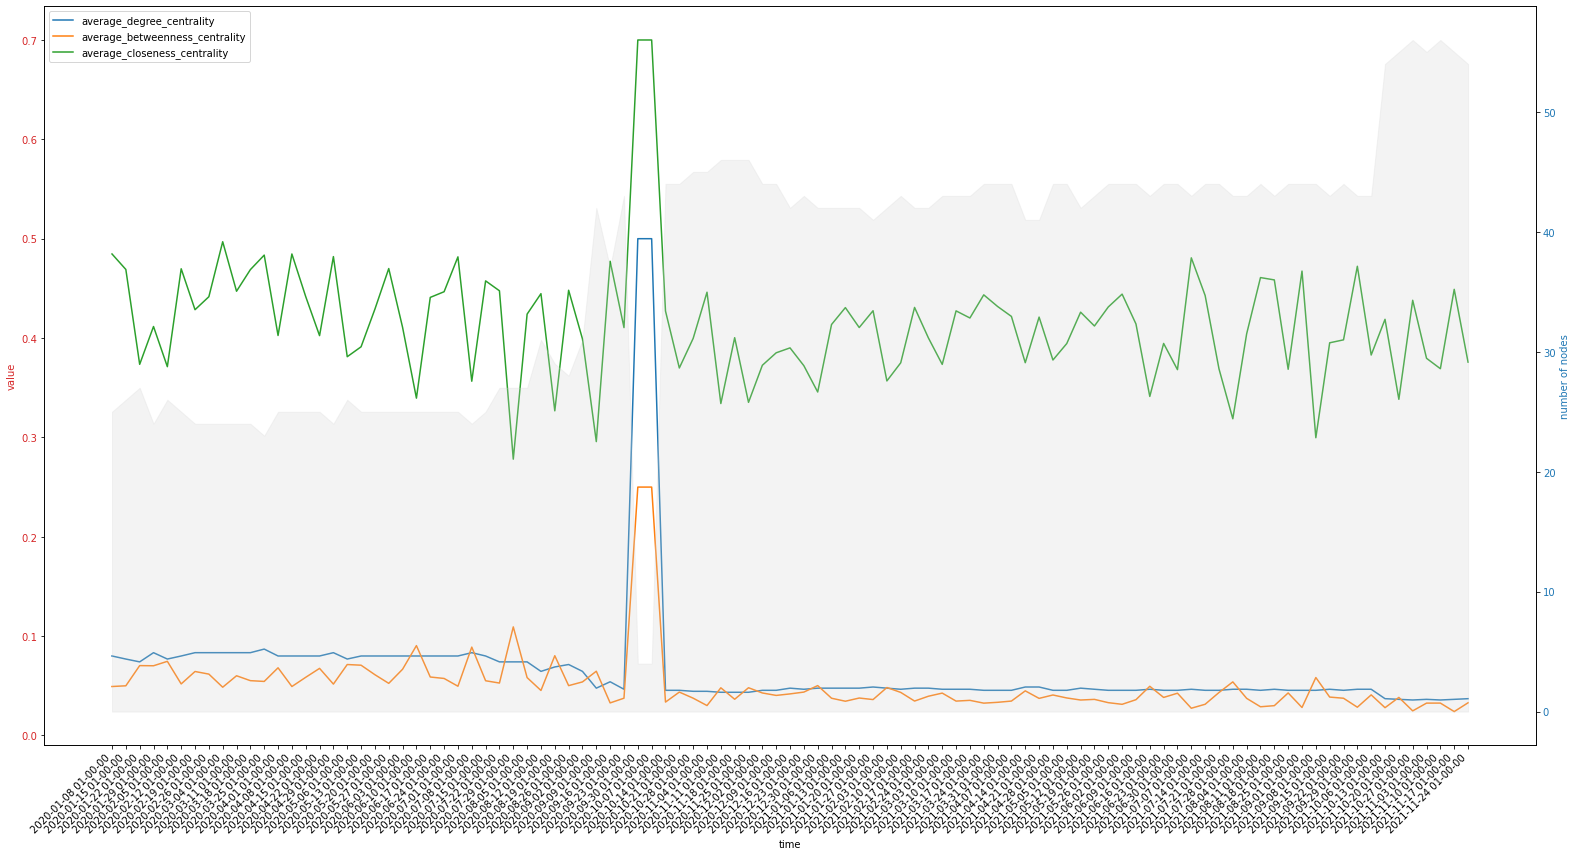

In [59]:
fig, ax1 = plt.subplots(figsize=(22, 12))


color = 'tab:red'
ax1.set_xlabel('time')
#ax1.tick_params(axis='x', rotation=45)
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')


ax1.set_ylabel('value', color=color)

to_skip = ['nodes', 'max_degree']
for column in df_mst_propetries:
    if column in to_skip:
        continue
    if 'centrality' not in column:
        continue
    ax1.plot(df_mst_propetries[column],label=column)
    ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('number of nodes', color=color)  # we already handled the x-label with ax1
#ax2.plot(df_mst_propetries['nodes'], color='grey', alpha=0.5)
ax2.fill_between(df_mst_propetries.index,df_mst_propetries['nodes'], color='lightgrey', alpha=0.25)
ax2.tick_params(axis='y', labelcolor=color)

#ticklabels = set([x[0:7] for x in df_mst_propetries.index])
#ax1.set_xticks(np.arange(1,len(ticklabels)+1))
#ax1.set_xticks(np.round(np.linspace(0, len(df_mst_propetries.index) - 1, len(ticklabels))).astype(int))
#ax1.set_xticklabels(ticklabels, rotation=30, ha='right') #add monthlabels to the xaxis

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

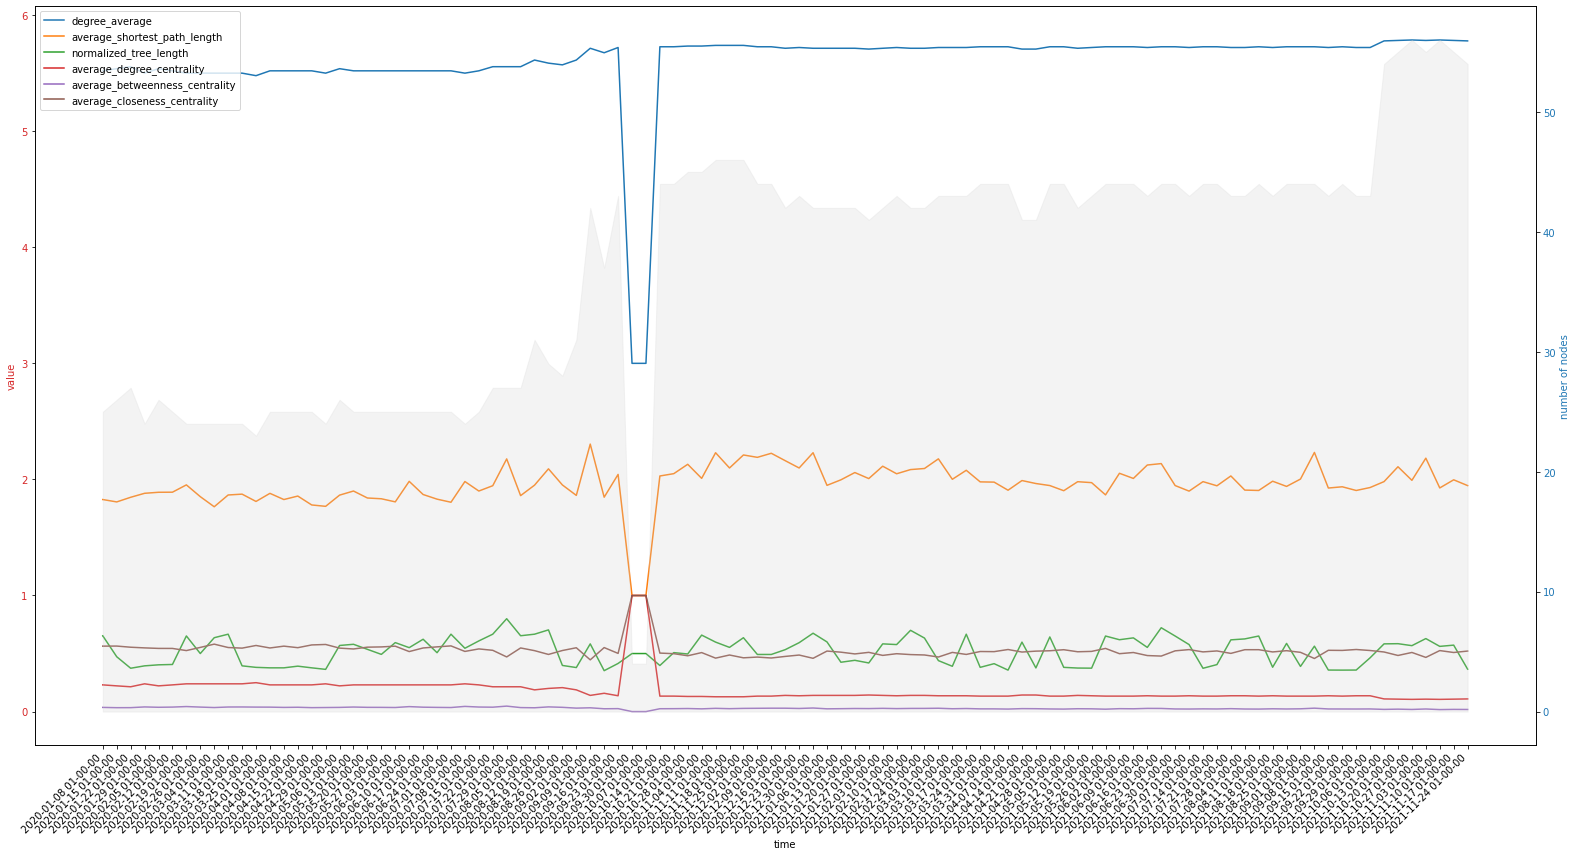

In [60]:
fig, ax1 = plt.subplots(figsize=(22, 12))


color = 'tab:red'
ax1.set_xlabel('time')
#ax1.tick_params(axis='x', rotation=45)
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')


ax1.set_ylabel('value', color=color)

to_skip = ['nodes', 'max_degree']
for column in df_pmfgs_properties:
    if column in to_skip:
        continue
    ax1.plot(df_pmfgs_properties[column],label=column)
    ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('number of nodes', color=color)  # we already handled the x-label with ax1
#ax2.plot(df_pmfgs_properties['nodes'], color='grey', alpha=0.5)
ax2.fill_between(df_pmfgs_properties.index,df_pmfgs_properties['nodes'], color='lightgrey', alpha=0.25)
ax2.tick_params(axis='y', labelcolor=color)

#ticklabels = set([x[0:7] for x in df_pmfgs_properties.index])
#ax1.set_xticks(np.arange(1,len(ticklabels)+1))
#ax1.set_xticks(np.round(np.linspace(0, len(df_pmfgs_properties.index) - 1, len(ticklabels))).astype(int))
#ax1.set_xticklabels(ticklabels, rotation=30, ha='right') #add monthlabels to the xaxis

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()